In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [102]:
df = pd.read_csv('crimedata.csv')
df.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [103]:
df.shape

(2215, 147)

In [148]:
df['population'].describe()

count    2.214000e+03
mean     4.983458e+04
std      1.341578e+05
min      1.000500e+04
25%      1.436450e+04
50%      2.278550e+04
75%      4.296175e+04
max      3.485398e+06
Name: population, dtype: float64

In [105]:
df.columns.tolist()

['communityname',
 'state',
 'countyCode',
 'communityCode',
 'fold',
 'population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumKidsBornNeverMar',
 'PctKidsBornNeverMar',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmig

In [106]:
df.duplicated().sum()

0

In [107]:
categorical_df = df.select_dtypes(include=['object', 'category'])
categorical_df

,communityname,state,countyCode,communityCode,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,5115,?,?,?,?,?,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,5250,?,?,?,?,?,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,5954,?,?,?,?,?,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,2451,?,?,?,?,?,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,3000,?,?,?,?,?,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,?,?,6470,?,?,?,?,?,...,1376,2268.72,2563,4225.82,489,806.25,34,56.06,545.75,7356.84
2211,Pinevillecity,LA,?,?,11471,?,?,?,?,?,...,104,860.43,574,4748.9,24,198.56,2,16.55,124.1,5824.44
2212,Yucaipacity,CA,?,?,8532,?,?,?,?,?,...,628,1709.26,895,2435.97,179,487.19,8,21.77,353.83,4654.2
2213,Beevillecity,TX,?,?,4436,?,?,?,?,?,...,192,1508.01,474,3722.9,13,102.1,1,7.85,691.17,5340.87


In [108]:
# Exclude specific columns
exclude_cols = ['communityname', 'state']
df[categorical_df.columns.difference(exclude_cols)] = df[categorical_df.columns.difference(exclude_cols)].apply(pd.to_numeric, errors='coerce')

In [109]:
from sklearn.impute import SimpleImputer

# Step 1: Drop columns with more than 30% null values (except exclude_cols)
threshold_col = 0.3 * len(df)
cols_to_drop = [col for col in df.columns if col not in exclude_cols and df[col].isnull().sum() > threshold_col]
df.drop(columns=cols_to_drop, inplace=True)

# Step 2: Drop rows with less than 5% null values
threshold_row = 0.05 * len(df.columns)
df.dropna(thresh=len(df.columns) - threshold_row, inplace=True)

# Step 3: Use SimpleImputer for numerical columns with missing values
num_cols = df.select_dtypes(include=['number']).columns.difference(exclude_cols)
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [110]:
df

,communityname,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,1.0,11980.0,3.10,1.37,91.78,6.50,1.88,12.47,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.000000,16.410000,41.020000,1394.590000
1,Marpletownship,PA,1.0,23123.0,2.82,0.80,95.57,3.44,0.85,11.01,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.250000,127.560000,1955.950000
2,Tigardcity,OR,1.0,29344.0,2.43,0.74,94.33,3.43,2.35,11.36,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.870000,218.590000,6167.510000
3,Gloversvillecity,NY,1.0,16656.0,2.40,1.70,97.35,0.50,0.70,12.55,...,225.0,1301.78,716.0,4142.56,47.0,271.93,30.907721,32.153682,306.640000,4908.241804
4,Bemidjicity,MN,1.0,11245.0,2.76,0.53,89.16,1.17,0.52,24.46,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.000000,40.050000,589.078922,9988.790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,10.0,56216.0,3.07,6.87,61.68,15.23,29.86,15.46,...,1376.0,2268.72,2563.0,4225.82,489.0,806.25,34.000000,56.060000,545.750000,7356.840000
2211,Pinevillecity,LA,10.0,12251.0,2.68,21.18,76.65,1.52,1.29,17.36,...,104.0,860.43,574.0,4748.90,24.0,198.56,2.000000,16.550000,124.100000,5824.440000
2212,Yucaipacity,CA,10.0,32824.0,2.46,0.52,92.62,0.98,11.00,11.81,...,628.0,1709.26,895.0,2435.97,179.0,487.19,8.000000,21.770000,353.830000,4654.200000
2213,Beevillecity,TX,10.0,13547.0,2.89,3.37,69.91,0.90,62.11,17.16,...,192.0,1508.01,474.0,3722.90,13.0,102.10,1.000000,7.850000,691.170000,5340.870000


In [111]:
df['communityname'].nunique()
df.drop(columns='communityname')

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,NJ,1.0,11980.0,3.10,1.37,91.78,6.50,1.88,12.47,21.44,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.000000,16.410000,41.020000,1394.590000
1,PA,1.0,23123.0,2.82,0.80,95.57,3.44,0.85,11.01,21.30,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.250000,127.560000,1955.950000
2,OR,1.0,29344.0,2.43,0.74,94.33,3.43,2.35,11.36,25.88,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.870000,218.590000,6167.510000
3,NY,1.0,16656.0,2.40,1.70,97.35,0.50,0.70,12.55,25.20,...,225.0,1301.78,716.0,4142.56,47.0,271.93,30.907721,32.153682,306.640000,4908.241804
4,MN,1.0,11245.0,2.76,0.53,89.16,1.17,0.52,24.46,40.53,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.000000,40.050000,589.078922,9988.790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,CA,10.0,56216.0,3.07,6.87,61.68,15.23,29.86,15.46,30.16,...,1376.0,2268.72,2563.0,4225.82,489.0,806.25,34.000000,56.060000,545.750000,7356.840000
2211,LA,10.0,12251.0,2.68,21.18,76.65,1.52,1.29,17.36,31.23,...,104.0,860.43,574.0,4748.90,24.0,198.56,2.000000,16.550000,124.100000,5824.440000
2212,CA,10.0,32824.0,2.46,0.52,92.62,0.98,11.00,11.81,20.96,...,628.0,1709.26,895.0,2435.97,179.0,487.19,8.000000,21.770000,353.830000,4654.200000
2213,TX,10.0,13547.0,2.89,3.37,69.91,0.90,62.11,17.16,30.01,...,192.0,1508.01,474.0,3722.90,13.0,102.10,1.000000,7.850000,691.170000,5340.870000


In [112]:
df['state'].nunique()

48

In [113]:
# Drop all categorical columns from df
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
test_df = df.drop(columns=categorical_cols)
test_df

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,1.0,11980.0,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.000000,16.410000,41.020000,1394.590000
1,1.0,23123.0,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.250000,127.560000,1955.950000
2,1.0,29344.0,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.870000,218.590000,6167.510000
3,1.0,16656.0,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,...,225.0,1301.78,716.0,4142.56,47.0,271.93,30.907721,32.153682,306.640000,4908.241804
4,1.0,11245.0,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.000000,40.050000,589.078922,9988.790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,10.0,56216.0,3.07,6.87,61.68,15.23,29.86,15.46,30.16,14.34,...,1376.0,2268.72,2563.0,4225.82,489.0,806.25,34.000000,56.060000,545.750000,7356.840000
2211,10.0,12251.0,2.68,21.18,76.65,1.52,1.29,17.36,31.23,16.97,...,104.0,860.43,574.0,4748.90,24.0,198.56,2.000000,16.550000,124.100000,5824.440000
2212,10.0,32824.0,2.46,0.52,92.62,0.98,11.00,11.81,20.96,9.53,...,628.0,1709.26,895.0,2435.97,179.0,487.19,8.000000,21.770000,353.830000,4654.200000
2213,10.0,13547.0,2.89,3.37,69.91,0.90,62.11,17.16,30.01,14.73,...,192.0,1508.01,474.0,3722.90,13.0,102.10,1.000000,7.850000,691.170000,5340.870000


In [114]:
x = test_df.drop(columns=['population'])
y = test_df['population']

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=43)

In [116]:
from sklearn.ensemble import RandomForestRegressor
random_seed = 42
model = RandomForestRegressor(random_state=random_seed)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [117]:
feature_importances = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
top_25_features = feature_importances.head(25)
print(top_25_features)

numbUrban              0.234313
murders                0.086457
HousVacant             0.081207
autoTheft              0.070184
robberies              0.068565
NumImmig               0.060468
assaults               0.055339
burglaries             0.054461
arsons                 0.042662
NumStreet              0.039527
NumUnderPov            0.032264
NumInShelters          0.031738
larcenies              0.021361
NumKidsBornNeverMar    0.018245
PctUsePubTrans         0.016217
rapes                  0.007937
PctBSorMore            0.006341
burglPerPop            0.005158
perCapInc              0.003406
agePct65up             0.002951
nonViolPerPop          0.002786
PctLargHouseOccup      0.002713
pctWRetire             0.002514
FemalePctDiv           0.002503
MalePctDivorce         0.002482
dtype: float64


In [118]:
top_25_df = df[top_25_features.index.tolist()]
top_25_df

,numbUrban,murders,HousVacant,autoTheft,robberies,NumImmig,assaults,burglaries,arsons,NumStreet,...,rapes,PctBSorMore,burglPerPop,perCapInc,agePct65up,nonViolPerPop,PctLargHouseOccup,pctWRetire,FemalePctDiv,MalePctDivorce
0,11980.0,0.0,64.0,16.0,1.0,1277.0,4.0,14.0,2.000000,0.0,...,0.000000,48.18,114.85,29711.0,11.33,1394.590000,4.17,18.39,5.22,3.67
1,23123.0,0.0,240.0,26.0,5.0,1920.0,24.0,57.0,1.000000,0.0,...,1.000000,29.89,242.37,20148.0,17.18,1955.950000,3.34,22.85,6.45,4.23
2,29344.0,3.0,544.0,136.0,56.0,1468.0,14.0,274.0,22.000000,0.0,...,6.000000,30.13,758.14,16946.0,10.28,6167.510000,2.05,14.56,14.76,10.10
3,0.0,0.0,669.0,47.0,10.0,339.0,33.0,225.0,30.907721,0.0,...,10.000000,10.81,1301.78,10810.0,17.57,4908.241804,2.56,18.33,14.47,10.98
4,0.0,0.0,333.0,91.0,4.0,196.0,14.0,91.0,5.000000,0.0,...,28.046338,25.28,728.93,8483.0,12.65,9988.790000,3.11,14.43,11.64,7.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216.0,10.0,683.0,489.0,121.0,10623.0,170.0,1376.0,34.000000,0.0,...,30.000000,15.79,2268.72,10237.0,8.08,7356.840000,9.91,14.41,16.28,10.22
2211,12251.0,0.0,523.0,24.0,1.0,275.0,10.0,104.0,2.000000,0.0,...,4.000000,19.28,860.43,9995.0,12.57,5824.440000,3.37,18.23,16.12,10.86
2212,32824.0,5.0,957.0,179.0,24.0,2414.0,96.0,628.0,8.000000,0.0,...,5.000000,12.42,1709.26,14131.0,20.73,4654.200000,3.50,23.56,12.38,9.89
2213,0.0,0.0,802.0,13.0,7.0,309.0,79.0,192.0,1.000000,0.0,...,2.000000,12.40,1508.01,8100.0,10.42,5340.870000,7.10,10.29,14.36,10.35


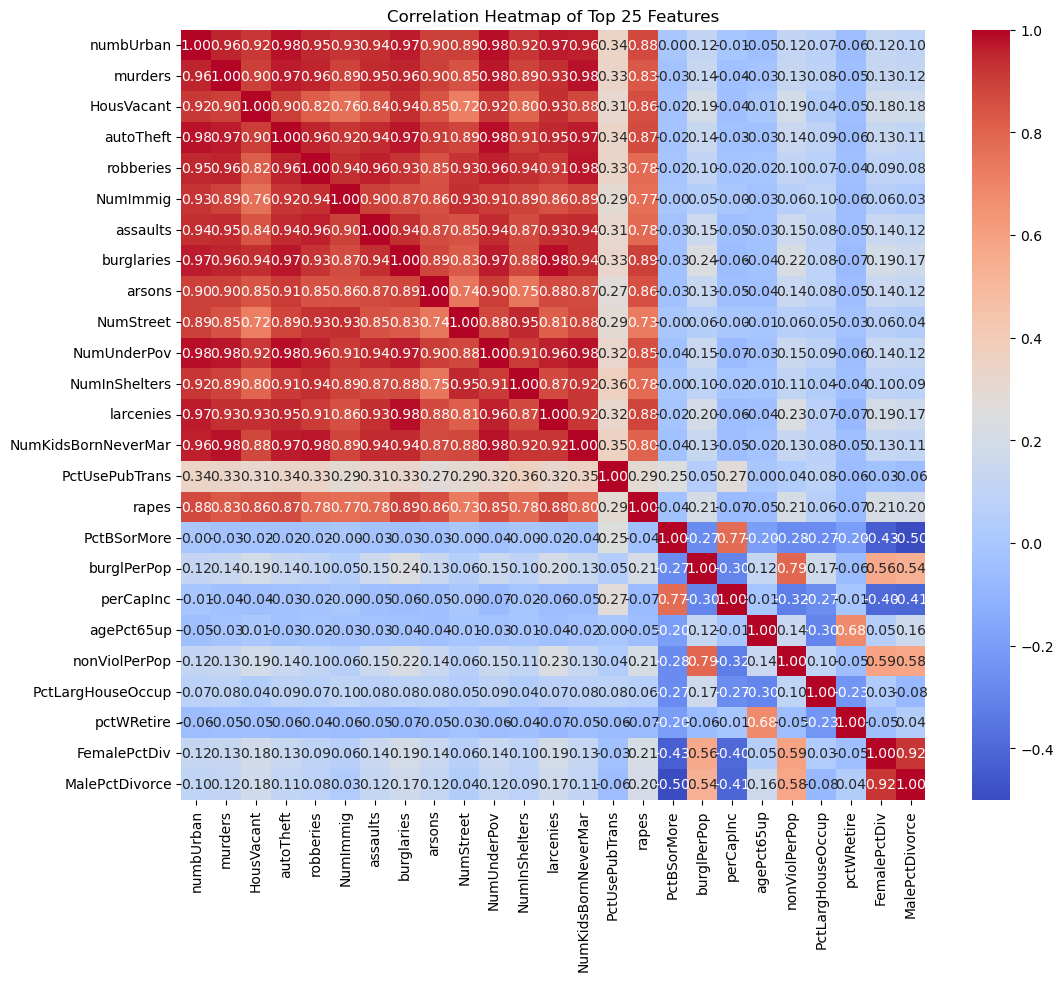

In [119]:
corr_matrix = top_25_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Top 25 Features')
plt.show()

In [120]:
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
topdf = top_25_df.drop(columns=high_corr_columns)
topdf

,numbUrban,PctUsePubTrans,rapes,PctBSorMore,burglPerPop,perCapInc,agePct65up,nonViolPerPop,PctLargHouseOccup,pctWRetire,FemalePctDiv
0,11980.0,9.63,0.000000,48.18,114.85,29711.0,11.33,1394.590000,4.17,18.39,5.22
1,23123.0,3.84,1.000000,29.89,242.37,20148.0,17.18,1955.950000,3.34,22.85,6.45
2,29344.0,4.37,6.000000,30.13,758.14,16946.0,10.28,6167.510000,2.05,14.56,14.76
3,0.0,3.31,10.000000,10.81,1301.78,10810.0,17.57,4908.241804,2.56,18.33,14.47
4,0.0,0.38,28.046338,25.28,728.93,8483.0,12.65,9988.790000,3.11,14.43,11.64
...,...,...,...,...,...,...,...,...,...,...,...
2210,56216.0,0.59,30.000000,15.79,2268.72,10237.0,8.08,7356.840000,9.91,14.41,16.28
2211,12251.0,1.15,4.000000,19.28,860.43,9995.0,12.57,5824.440000,3.37,18.23,16.12
2212,32824.0,0.12,5.000000,12.42,1709.26,14131.0,20.73,4654.200000,3.50,23.56,12.38
2213,0.0,0.00,2.000000,12.40,1508.01,8100.0,10.42,5340.870000,7.10,10.29,14.36


In [121]:
df = df[['state', 'fold'] + topdf.columns.tolist() + ['population']]
df

,state,fold,numbUrban,PctUsePubTrans,rapes,PctBSorMore,burglPerPop,perCapInc,agePct65up,nonViolPerPop,PctLargHouseOccup,pctWRetire,FemalePctDiv,population
0,NJ,1.0,11980.0,9.63,0.000000,48.18,114.85,29711.0,11.33,1394.590000,4.17,18.39,5.22,11980.0
1,PA,1.0,23123.0,3.84,1.000000,29.89,242.37,20148.0,17.18,1955.950000,3.34,22.85,6.45,23123.0
2,OR,1.0,29344.0,4.37,6.000000,30.13,758.14,16946.0,10.28,6167.510000,2.05,14.56,14.76,29344.0
3,NY,1.0,0.0,3.31,10.000000,10.81,1301.78,10810.0,17.57,4908.241804,2.56,18.33,14.47,16656.0
4,MN,1.0,0.0,0.38,28.046338,25.28,728.93,8483.0,12.65,9988.790000,3.11,14.43,11.64,11245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,CA,10.0,56216.0,0.59,30.000000,15.79,2268.72,10237.0,8.08,7356.840000,9.91,14.41,16.28,56216.0
2211,LA,10.0,12251.0,1.15,4.000000,19.28,860.43,9995.0,12.57,5824.440000,3.37,18.23,16.12,12251.0
2212,CA,10.0,32824.0,0.12,5.000000,12.42,1709.26,14131.0,20.73,4654.200000,3.50,23.56,12.38,32824.0
2213,TX,10.0,0.0,0.00,2.000000,12.40,1508.01,8100.0,10.42,5340.870000,7.10,10.29,14.36,13547.0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              2215 non-null   object 
 1   fold               2215 non-null   float64
 2   numbUrban          2215 non-null   float64
 3   PctUsePubTrans     2215 non-null   float64
 4   rapes              2215 non-null   float64
 5   PctBSorMore        2215 non-null   float64
 6   burglPerPop        2215 non-null   float64
 7   perCapInc          2215 non-null   float64
 8   agePct65up         2215 non-null   float64
 9   nonViolPerPop      2215 non-null   float64
 10  PctLargHouseOccup  2215 non-null   float64
 11  pctWRetire         2215 non-null   float64
 12  FemalePctDiv       2215 non-null   float64
 13  population         2215 non-null   float64
dtypes: float64(13), object(1)
memory usage: 242.4+ KB


In [123]:
df.isnull().sum()

state                0
fold                 0
numbUrban            0
PctUsePubTrans       0
rapes                0
PctBSorMore          0
burglPerPop          0
perCapInc            0
agePct65up           0
nonViolPerPop        0
PctLargHouseOccup    0
pctWRetire           0
FemalePctDiv         0
population           0
dtype: int64

In [124]:
max_pop = df['population'].idxmax()

# Drop the row with the maximum 'population' value
df = df.drop(index=max_pop)

<Axes: xlabel='numbUrban', ylabel='rapes'>

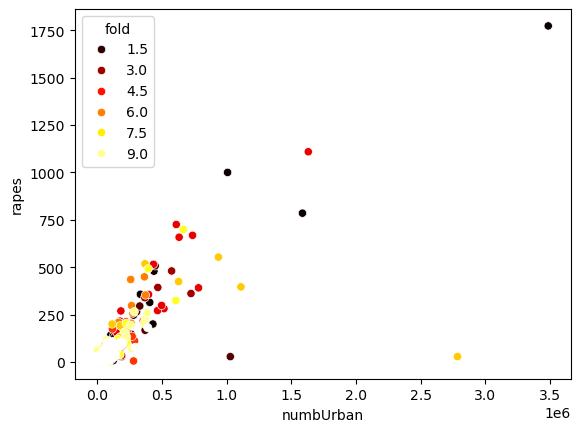

In [125]:
sns.scatterplot(x='numbUrban', y='rapes', hue='fold', data=df, palette='hot')

<Axes: xlabel='PctUsePubTrans', ylabel='numbUrban'>

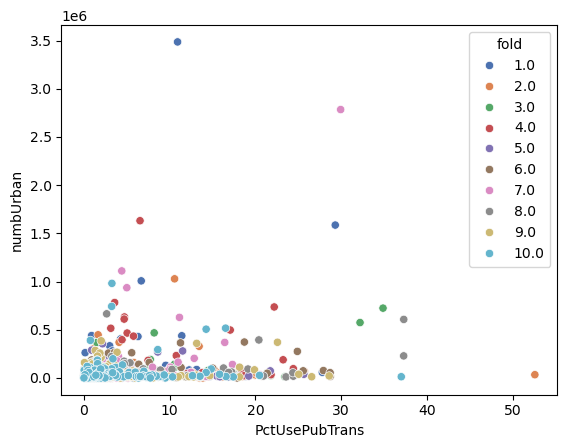

In [127]:
sns.scatterplot(x='PctUsePubTrans', y='numbUrban', hue='fold', palette='deep', data=df)

<Axes: xlabel='burglPerPop', ylabel='rapes'>

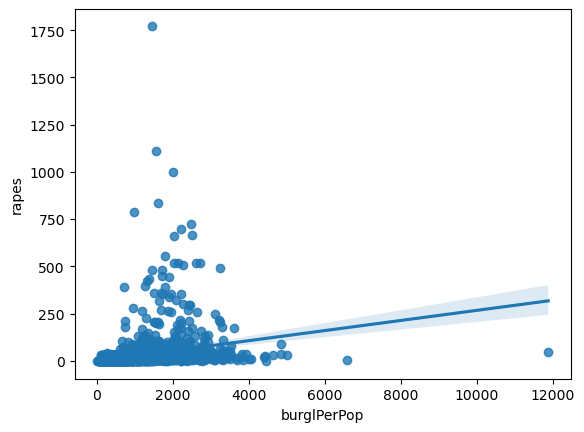

In [129]:
sns.regplot(x='burglPerPop', y='rapes', data=df)

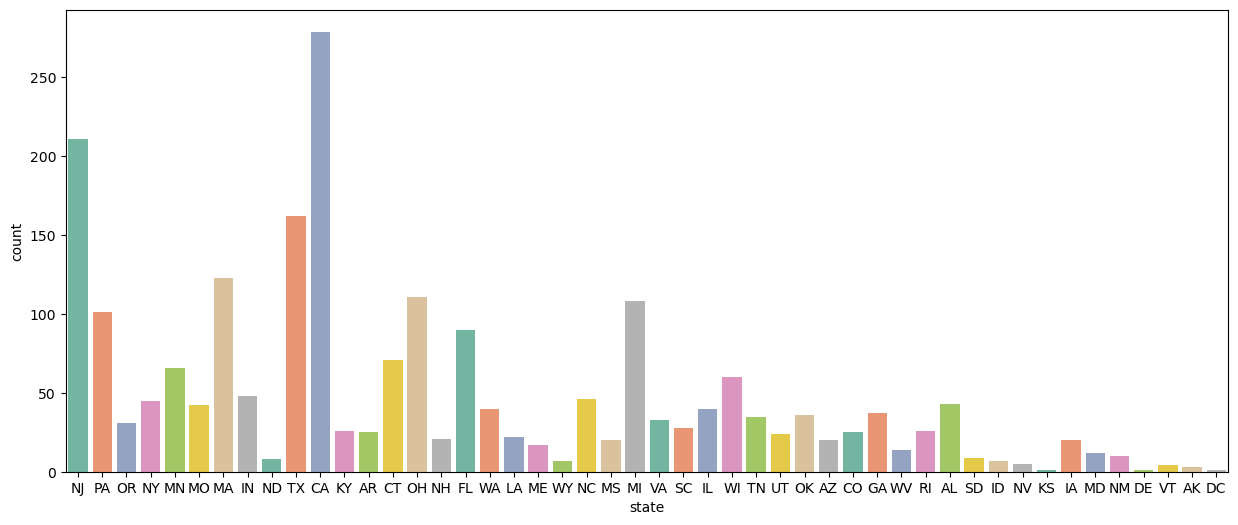

In [130]:
plt.figure(figsize=(15, 6))
sns.countplot(x='state', data = df, palette='Set2')
plt.show()

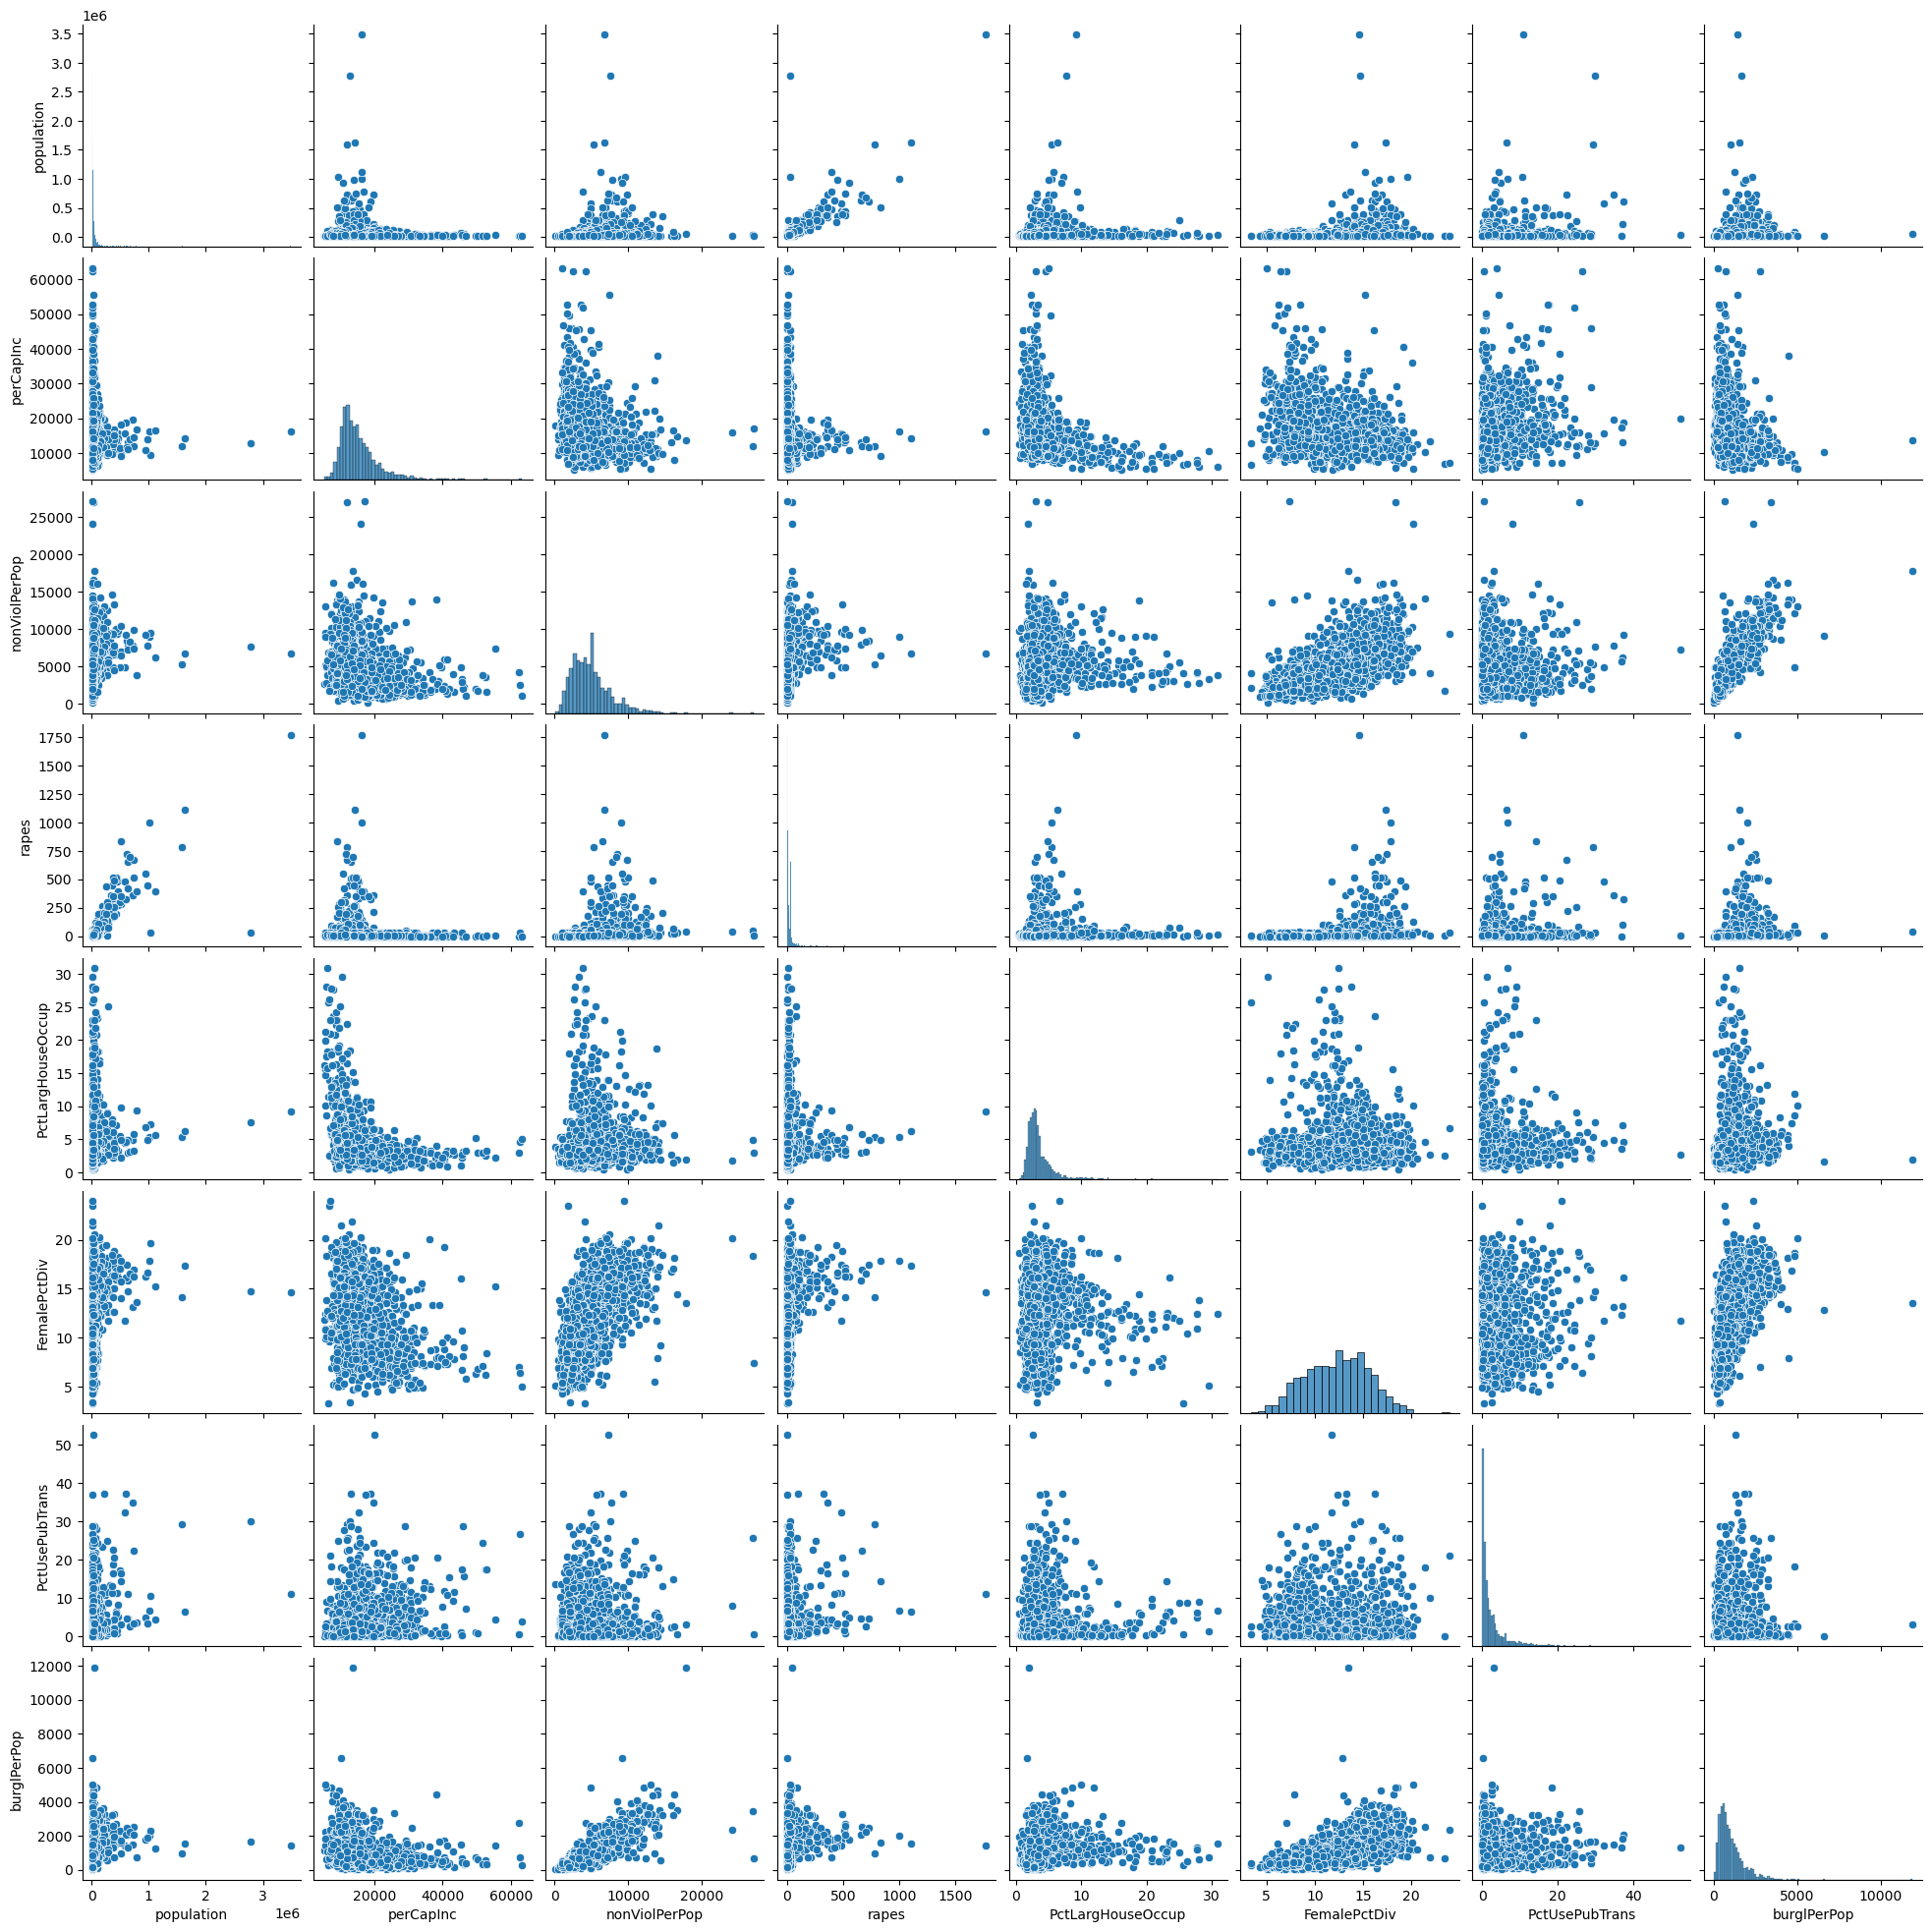

In [132]:
sns.pairplot(df[['population', 'perCapInc', 'nonViolPerPop', 'rapes', 'PctLargHouseOccup', 'FemalePctDiv', 'PctUsePubTrans', 'burglPerPop']], palette='Set2')
plt.show()

In [133]:
df = df.drop(columns=['state'])

In [134]:
x = df.drop(columns=['population'])
y = df['population']

In [135]:
x.columns.tolist()

['fold',
 'numbUrban',
 'PctUsePubTrans',
 'rapes',
 'PctBSorMore',
 'burglPerPop',
 'perCapInc',
 'agePct65up',
 'nonViolPerPop',
 'PctLargHouseOccup',
 'pctWRetire',
 'FemalePctDiv']

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

In [138]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [139]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [140]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

In [141]:
best_model = None
best_score = float('-inf')
best_model_name = ""

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)*100
    
    print(f"R2 Score of {model_name} = {r2:.4f}")
    
    if r2 > best_score:
        best_score = r2
        best_model_name = model_name
        best_model = model


R2 Score of Linear Regression = 99.7162
R2 Score of Lasso Regression = 99.7165
R2 Score of Decision Tree = 91.2591
R2 Score of Random Forest = 92.0343
R2 Score of Gradient Boosting = 95.9666
R2 Score of SVR = -5.5966
R2 Score of KNN = 60.2292


In [142]:
print(f"\nThe best model is: {best_model_name} with R²: {best_score:.4f}")


The best model is: Lasso Regression with R²: 99.7165


In [143]:
from sklearn.model_selection import GridSearchCV
lasso = best_model

param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'max_iter': [1000, 5000]    
}

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_lasso_model = grid_search.best_estimator_

print(f"Best hyperparameters found: {best_params}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best hyperparameters found: {'alpha': 1, 'max_iter': 1000}


In [144]:
y_pred = best_lasso_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100


print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 55609012.5448
Mean Absolute Error: 5753.7387
R² Score: 99.7165


In [145]:
# model Saving
import pickle
file = 'model.pkl'
pickle.dump(model,open(file,'wb'))